In [1]:
# Replaced by 'LatLonStdDev & numSat Correlation Plots' notebook

In [7]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

from decimal import *

from pandasgui import show

In [8]:
gmID_df = pd.read_csv( '/home/rcoldren_linux/Desktop/Data/groupMetadataID_list_updated.csv' )

In [9]:
gmID_list = gmID_df[ 'groupMetadataID' ].tolist()

In [10]:
desktop_path = '/home/rcoldren_linux/Desktop'

In [11]:
topic = '/apollo/sensor/gnss/best_pose'

dir_friendly_topic = topic.replace( '/', '_' )

In [12]:
best_pose_dfs = []

for gmID in gmID_list:

    csv_name = gmID + dir_friendly_topic

    temp_df = pd.read_csv( f'{ desktop_path }/Raw_Data/{ gmID }/{ dir_friendly_topic }/{ csv_name }.csv' )

    temp_df = temp_df.sort_values( 'time' )

    best_pose_dfs.append( temp_df )

In [13]:
all_best_pose_df = best_pose_dfs[ 0 ].copy()

for df_index in range( 1, len( best_pose_dfs ) ):

    cur_df = best_pose_dfs[ df_index ]

    all_best_pose_df = pd.concat( [ all_best_pose_df, cur_df ] )

In [14]:
def angular_distance( latitude, longitude ): # angular distance from latitude, longitude = 0 on globe 

    return np.arccos( np.cos( latitude ) * np.cos( longitude ) )

In [15]:
modified_all_best_pose_df = all_best_pose_df.copy()

In [16]:
modified_all_best_pose_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446511 entries, 838 to 780
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   topic                   446511 non-null  object 
 1   gpsGlonassUsedMask      446511 non-null  int64  
 2   time                    446511 non-null  int64  
 3   longitudeStdDev         446511 non-null  float64
 4   undulation              446511 non-null  float64
 5   numSatsTracked          446511 non-null  int64  
 6   baseStationId           440541 non-null  object 
 7   latitudeStdDev          446511 non-null  float64
 8   differentialAge         446511 non-null  float64
 9   solType                 446511 non-null  object 
 10  galileoBeidouUsedMask   446511 non-null  int64  
 11  _id                     446511 non-null  object 
 12  latitude                446511 non-null  float64
 13  numSatsL1               446511 non-null  int64  
 14  datumId                 44

In [17]:
modified_all_best_pose_df = modified_all_best_pose_df[ [ 'latitudeStdDev', 'longitudeStdDev', 'numSatsTracked', 
                                                        'numSatsL1', 'numSatsMulti', 'numSatsInSolution' ] ]

In [18]:
modified_all_best_pose_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446511 entries, 838 to 780
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   latitudeStdDev     446511 non-null  float64
 1   longitudeStdDev    446511 non-null  float64
 2   numSatsTracked     446511 non-null  int64  
 3   numSatsL1          446511 non-null  int64  
 4   numSatsMulti       446511 non-null  int64  
 5   numSatsInSolution  446511 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 23.8 MB


In [19]:
latitudeStdDev_list = modified_all_best_pose_df[ 'latitudeStdDev' ].tolist()

longitudeStdDev_list = modified_all_best_pose_df[ 'longitudeStdDev' ].tolist()

In [104]:
LatLonStdDev_AngDist_list = []
for latitudeStdDev, longitudeStdDev in zip( latitudeStdDev_list, longitudeStdDev_list ):

    latitudeStdDev = float( latitudeStdDev ) * np.pi / 180

    longitudeStdDev = float( longitudeStdDev ) * np.pi / 180

    latlon_stddev_angdist = angular_distance( latitudeStdDev, longitudeStdDev )

    latlon_stddev_angdist = Decimal( latlon_stddev_angdist * 180 / np.pi )

    LatLonStdDev_AngDist_list.append( latlon_stddev_angdist )

In [105]:
modified_all_best_pose_df[ 'LatLonStdDev_AngDist' ] = LatLonStdDev_AngDist_list

In [106]:
modified_all_best_pose_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446511 entries, 838 to 780
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitudeStdDev        446511 non-null  float64
 1   longitudeStdDev       446511 non-null  float64
 2   numSatsTracked        446511 non-null  int64  
 3   numSatsL1             446511 non-null  int64  
 4   numSatsMulti          446511 non-null  int64  
 5   numSatsInSolution     446511 non-null  int64  
 6   LatLonStdDev_AngDist  446511 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 27.3+ MB


In [107]:
modified_all_best_pose_df[ 'LatLonStdDev_AngDist' ] = pd.to_numeric( modified_all_best_pose_df[ 'LatLonStdDev_AngDist' ] )

In [108]:
modified_all_best_pose_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446511 entries, 838 to 780
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitudeStdDev        446511 non-null  float64
 1   longitudeStdDev       446511 non-null  float64
 2   numSatsTracked        446511 non-null  int64  
 3   numSatsL1             446511 non-null  int64  
 4   numSatsMulti          446511 non-null  int64  
 5   numSatsInSolution     446511 non-null  int64  
 6   LatLonStdDev_AngDist  446511 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 27.3 MB


In [109]:
group_by_numsat = modified_all_best_pose_df.groupby( 'numSatsInSolution' )

In [110]:
group_by_numsat.agg( { 'LatLonStdDev_AngDist': [ 'mean', 'max', 'count' ] } )

LatLonStdDev_AngDist                   
                                  mean         max  count
numSatsInSolution                                        
0                             6.467593  136.901182   2224
4                             1.768778  130.973500    471
5                             3.750061  151.093077   3303
6                             2.083427  114.414119   6696
7                             0.974964   43.318164  16258
8                             0.712569   49.646634  19313
9                             0.523927   31.648139  24431
10                            0.379797   28.527354  30551
11                            0.273993   11.060705  36554
12                            0.152330   26.610630  41303
13                            0.085433   14.091669  43035
14                            0.058326   15.731258  37825
15                            0.046149   10.531823  28687
16                            0.040540    5.616363  21275
17                            0.034807    6.193135  15043
18                            0.033758    2.679081   9376
19                            0.042903    2.563950   6053
20                            0.038932    2.030469   6400
21                            0.030610    1.047931   6862
22                            0.029232    7.591308   7382
23                            0.026568    3.297045   8063
24                            0.023897    1.281480   9109
25                            0.022633    0.747598   9440
26                            0.021894    1.636728   9579
27                            0.021010    0.778847   9301
28                            0.019548    0.420057   8841
29                            0.018550    0.419500   8487
30                            0.017779    0.419622   6816
31                            0.016866    0.652949   5492
32                            0.015624    0.259275   4176
33                            0.016510    0.259423   2412
34                            0.022211    0.652987   1102
35                            0.016352    0.034262    449
36                            0.017204    0.024945    165
37                            0.016555    0.021931     32
38                            0.021591    0.022039      5

In [119]:
group_by_numsat_latlontddev_mean_df = group_by_numsat.agg( { 'LatLonStdDev_AngDist': [ 'mean' ] } )

group_by_numsat_latlontddev_mean_df.reset_index( inplace = True )

In [120]:
group_by_numsat_latlontddev_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (numSatsInSolution, )         36 non-null     int64  
 1   (LatLonStdDev_AngDist, mean)  36 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes


In [130]:
num_sat_list = group_by_numsat_latlontddev_mean_df[ 'numSatsInSolution' ].tolist()

mean_std_dev_list = group_by_numsat_latlontddev_mean_df[ 'LatLonStdDev_AngDist', 'mean' ].tolist()

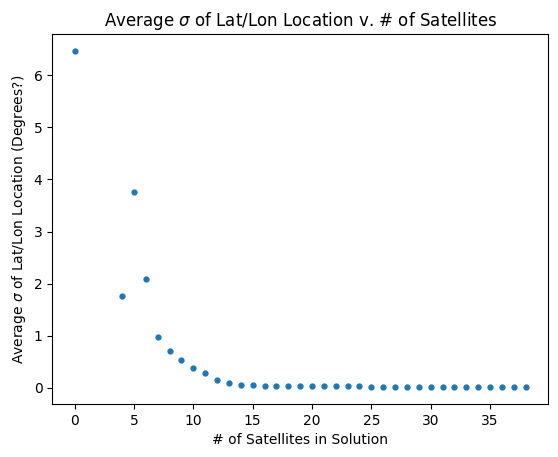

In [131]:
plt.plot( num_sat_list, mean_std_dev_list, marker = '.', ls = '', ms = 7 )

plt.xlabel( '# of Satellites in Solution' )

plt.ylabel( 'Average $\sigma$ of Lat/Lon Location (Degrees?)' )

plt.title( 'Average $\sigma$ of Lat/Lon Location v. # of Satellites' )

plt.show()

In [132]:
num_sat_list = modified_all_best_pose_df[ 'numSatsInSolution' ].tolist()

std_dev_list = modified_all_best_pose_df[ 'LatLonStdDev_AngDist' ].tolist()

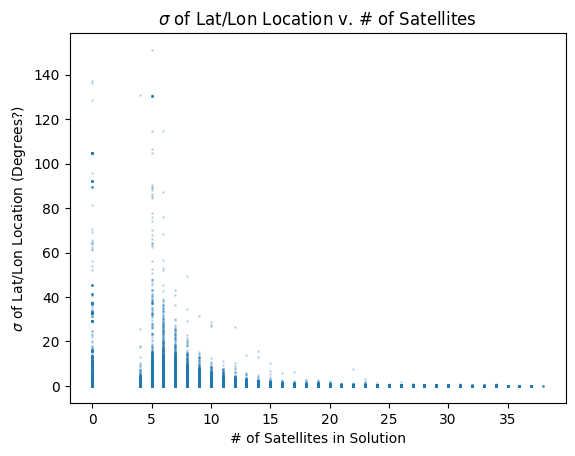

In [133]:
plt.plot( num_sat_list, std_dev_list, marker = '.', ls = '', ms = '2', alpha = 1 / 5 )

plt.xlabel( '# of Satellites in Solution' )

plt.ylabel( '$\sigma$ of Lat/Lon Location (Degrees?)' )

plt.title( '$\sigma$ of Lat/Lon Location v. # of Satellites' )

plt.show()

In [125]:
show( modified_all_best_pose_df )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
/tmp/ipykernel_218316/2049524788.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_218316/2049524788.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_218316/2049524788.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_218316/2049524788.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future ve

In [126]:
show( all_best_pose_df )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
/tmp/ipykernel_218316/2072314706.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_218316/2072314706.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_218316/2072314706.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_218316/2072314706.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future ve